In [2]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].
from __future__ import division
import numpy as np
import math

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        
        return np.random.uniform(mu - sigma/math.sqrt(3), mu + sigma/math.sqrt(3), n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")


In [22]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")
x0 = 0
#yk = 1/(k+1)  step length 

ordering = np.random.choice(5, 5, replace=True)
print(ordering)

[1 1 2 0 3]


In [9]:
# IGD, the ordering is permitted to have replacement. 
#
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    #print(ordering)
    x0 = 0
    k = 0
    xk = x0
    Listx = []
    Listobj = []
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.        
    for i in ordering:
        target = y[i]
        gama = 1/ (k + 1)
        xk = xk - gama*(xk - target)
        k += 1
        Listx.append(xk)
        objk = 0
        for j in y:
            objk += (xk - j)**2
        objk = objk/2
        Listobj.append(objk)       
    return xk, Listobj

xk1 ,Listobj1 = IGD_wr_task1(y1)
print()
xk2 ,Listobj2 = IGD_wr_task1(y2)
print()


# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    #print(ordering)
    Listx = []
    Listobj = []
    k = 0
    x0 = 0
    xk = x0
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    for i in ordering:
        target = y[i]
        gama = 1/ (k + 1)
        xk = xk - gama*(xk - target)
        k += 1
        Listx.append(xk)
        objk = 0
        for j in y:
            objk += (xk - j)**2
        objk = objk/2
        Listobj.append(objk)       
    return xk, Listobj #Listx

xk1_no ,Listobj1_no = IGD_wo_task1(y1)
print()
xk2_no ,Listobj2_no = IGD_wo_task1(y2)



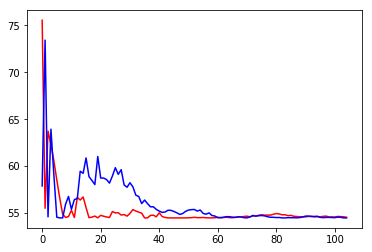

In [20]:
import matplotlib.pyplot as plt
plt.plot(np.arange(105), Listobj1, 'r')
plt.plot(np.arange(105), Listobj1_no, 'b')
plt.show()




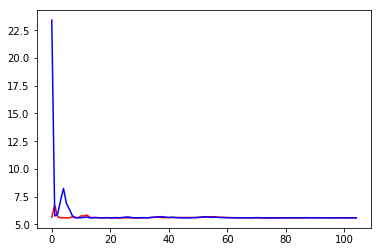

In [21]:
plt.plot(np.arange(105), Listobj2, 'r')
plt.plot(np.arange(105), Listobj2_no, 'b')
plt.show()